In [1]:
# Importing libraries
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler 
import warnings
warnings.filterwarnings('ignore')
import scipy
from sklearn.cluster import KMeans

In [2]:
# Importing coordinates
local = pd.read_csv(r"C:\Users\joaoa\Desktop\Doutoramento\Professora\Nova pasta\Todos os Pontos (temperatura)\local.cvs")

# Defining parameters
Y = range(1950, 2023) #1950-2023
T = ["no restriction", "9h-9h"]
H = [1,2,3,4,6,8,12,24,48,72,96,120] # [1,2,3,4,6,8,12,24,48,72,96,120]

In [3]:
r'''
# Creating resume dataframe
df_col = pd.read_csv(r"D:\Precipitation\by_water_year\era5land_total_precipitation_1950_1951_(mm).csv", compression = "zip")
max_precipitations = pd.DataFrame(columns = ["year", "type_of_period", "duration"] + list(df_col.columns[2:]))


i = -1
    
for year in Y:
    df_year = pd.read_csv(r"D:\Precipitation\by_water_year\era5land_total_precipitation_" + str(year) + "_" + str(year+1) + "_(mm).csv", compression = "zip")
    print("Water year " + str(year) + "_" + str(year+1) + " processed.")

    for type_of_period in T:
        
        for hours in H:
            i += 1
            df_roll = df_year.iloc[:, 2:].rolling(hours).sum()
            df_roll = pd.concat([df_year.iloc[0:(8761-hours),0], df_year.iloc[(hours-1):,1].reset_index(drop = True), df_roll.iloc[(hours-1):, :].reset_index(drop = True)], axis = 1)
            df_roll.columns = df_year.columns
            df_roll["ti"] = pd.to_datetime(df_roll["ti"], format = '%Y-%m-%d %H:%M:%S')
            df_roll["tf"] = pd.to_datetime(df_roll["tf"], format = '%Y-%m-%d %H:%M:%S')

            if type_of_period == "9h-9h":
                if hours < 24:
                    df_roll = df_roll[((df_roll["ti"].dt.hour < df_roll["tf"].dt.hour) & (df_roll["ti"].dt.hour >= 9)) | ((df_roll["ti"].dt.hour < df_roll["tf"].dt.hour) & (df_roll["tf"].dt.hour <= 9)) | ((df_roll["ti"].dt.hour > df_roll["tf"].dt.hour) & (df_roll["ti"].dt.hour >= 9) & (df_roll["tf"].dt.hour <= 9))]
                else:
                    df_roll = df_roll[(df_roll["ti"].dt.hour == 9) & (df_roll["tf"].dt.hour == 9)]
                
                
            content = [str(year) + "_" + str(year+1), type_of_period, str(hours) + "h"] + list(df_roll.iloc[:,2:].max())
            max_precipitations.loc[i, :] = content

max_precipitations.to_csv(r"D:\Precipitation\by_water_year\max_precipitations_(mm).csv", index = False)
max_precipitations
'''

'\n# Creating resume dataframe\ndf_col = pd.read_csv(r"D:\\Precipitation\\by_water_year\\era5land_total_precipitation_1950_1951_(mm).csv", compression = "zip")\nmax_precipitations = pd.DataFrame(columns = ["year", "type_of_period", "duration"] + list(df_col.columns[2:]))\n\n\ni = -1\n    \nfor year in Y:\n    df_year = pd.read_csv(r"D:\\Precipitation\\by_water_year\\era5land_total_precipitation_" + str(year) + "_" + str(year+1) + "_(mm).csv", compression = "zip")\n    print("Water year " + str(year) + "_" + str(year+1) + " processed.")\n\n    for type_of_period in T:\n        \n        for hours in H:\n            i += 1\n            df_roll = df_year.iloc[:, 2:].rolling(hours).sum()\n            df_roll = pd.concat([df_year.iloc[0:(8761-hours),0], df_year.iloc[(hours-1):,1].reset_index(drop = True), df_roll.iloc[(hours-1):, :].reset_index(drop = True)], axis = 1)\n            df_roll.columns = df_year.columns\n            df_roll["ti"] = pd.to_datetime(df_roll["ti"], format = \'%Y-%m-

In [4]:
max_precipitations = pd.read_csv(r"D:\Precipitation\by_water_year\max_precipitations_(mm).csv")
max_precipitations

,year,type_of_period,duration,P0000,P0001,P0002,P0003,P0004,P0005,P0006,...,P1047,P1048,P1055,P1056,P1057,P1058,P1059,P1062,P1063,P1064
0,1950_1951,no restriction,1h,8.326463,8.243036,8.805152,9.028085,9.084161,8.476909,7.380027,...,3.436994,3.357664,3.744721,3.943034,3.918417,3.777545,3.583334,4.295899,4.206998,4.134510
1,1950_1951,no restriction,2h,15.106078,16.101751,16.759608,16.780123,16.432732,15.006237,13.470327,...,6.239377,5.898822,7.132474,7.441573,7.321216,7.192655,7.053152,8.147297,7.940779,7.769816
2,1950_1951,no restriction,3h,20.434577,22.103149,22.261806,21.800894,22.388998,21.266129,19.032700,...,7.886067,8.359287,10.383461,10.725383,10.626908,10.405345,10.334227,11.299809,11.242369,11.195865
3,1950_1951,no restriction,4h,23.979615,25.218735,26.281431,26.591893,26.449654,24.742782,22.127772,...,8.817460,9.966318,14.006458,14.470104,13.779424,13.340397,13.321247,14.879042,14.202038,13.961323
4,1950_1951,no restriction,6h,27.777676,29.959129,30.581430,30.573227,30.292848,28.803440,26.464701,...,9.726975,12.720834,19.964095,20.419532,19.537376,18.939698,18.073954,21.215523,20.230791,19.408811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1747,2022_2023,9h-9h,24h,54.779407,84.152669,78.163899,69.087140,61.068974,52.875238,47.976034,...,33.152206,27.432676,23.512300,24.586378,25.095019,25.851524,27.461352,29.078925,29.064724,29.050523
1748,2022_2023,9h-9h,48h,87.853795,110.887036,107.861828,103.527183,96.785700,88.935407,80.281787,...,38.806304,32.095753,46.217747,48.270375,49.124993,49.509700,50.263621,50.270073,50.356567,50.426278
1749,2022_2023,9h-9h,72h,94.963124,117.144329,117.125774,116.913173,110.899793,101.122091,88.095980,...,38.814284,32.113306,47.071073,49.186960,50.157759,50.774843,51.829558,51.357064,51.497780,51.613968
1750,2022_2023,9h-9h,96h,114.451494,142.719587,142.209170,141.910078,135.120828,124.048291,109.234199,...,45.058457,43.492522,67.695491,71.006805,73.210482,74.905513,76.910375,76.315241,77.277005,78.081276


In [5]:
# Collecting all information in one dictionary
dict_max = {"no restriction" : {}, "9h-9h" : {}}

for type_of_period in T: 
    for hours in H:
        dict_max[type_of_period][str(hours) + "h"] = max_precipitations[(max_precipitations["type_of_period"] == type_of_period) & (max_precipitations["duration"] == str(hours) + "h")].iloc[:, 3:].reset_index(drop = True)

In [6]:
K = range(2, 21)

seq_clusters = {}

for n in K:
    seq_clusters[n] = pd.DataFrame()

for h in H:
    df = dict_max["no restriction"][str(h) + "h"]
    
    # Standardizing dataframe
    scaler = StandardScaler() 
    stand_precip = scaler.fit_transform(df) 
    stand_precip = pd.DataFrame(stand_precip, columns = df.columns)
    stand_precip = stand_precip*np.sqrt((len(stand_precip)-1)/len(stand_precip))

    # Transposing dataframe
    transp = stand_precip.transpose()
    
    # Clustering (k-means)
    inertia = []

    for n in K:
        X = stand_precip.transpose()
        kmeans = KMeans(n_clusters = n, random_state = 42)
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)
        kmeans.labels_ += 1
        transp["clusters_" + str(n) + " | " + str(h) + "h"] = kmeans.labels_
        
        # Concatenating clusters   
        seq_clusters[n] = pd.concat([seq_clusters[n], transp.iloc[:,-1]], axis = 1)

        
# Creating a final column with sequence
for n in K:
    seq_clusters[n] = seq_clusters[n].astype(str)
    
    i = 0
    seq_clusters[n]["code"] = ""
    for h in H:
        seq_clusters[n]["code"] = seq_clusters[n]["code"] + seq_clusters[n].iloc[:,i]
        i += 1

In [7]:
seq_clusters[2]

,clusters_2 | 1h,clusters_2 | 2h,clusters_2 | 3h,clusters_2 | 4h,clusters_2 | 6h,clusters_2 | 8h,clusters_2 | 12h,clusters_2 | 24h,clusters_2 | 48h,clusters_2 | 72h,clusters_2 | 96h,clusters_2 | 120h,code
P0000,2,2,2,2,2,1,1,2,1,1,2,2,222221121122
P0001,2,2,2,2,2,1,1,2,1,1,2,2,222221121122
P0002,2,2,2,2,2,1,1,2,1,1,2,2,222221121122
P0003,2,2,2,2,2,1,1,2,1,1,2,2,222221121122
P0004,2,2,2,2,2,1,1,2,1,1,2,2,222221121122
...,...,...,...,...,...,...,...,...,...,...,...,...,...
P1058,1,1,2,2,2,2,2,1,2,2,1,1,112222212211
P1059,1,1,2,2,2,2,2,1,2,2,1,1,112222212211
P1062,1,1,2,2,2,2,2,1,2,2,1,1,112222212211
P1063,1,1,2,2,2,2,2,1,2,2,1,1,112222212211


In [8]:
p = 0
m = 0
for n in K: 
    print(str(n) + " clusters:", seq_clusters[n].groupby("code")["code"].agg("count").sort_values(ascending = False)[0:n].sum())
    if seq_clusters[n].groupby("code")["code"].agg("count").sort_values(ascending = False)[0:n].sum() >= p:
        p = seq_clusters[n].groupby("code")["code"].agg("count").sort_values(ascending = False)[0:n].sum()
        m = n
        
print("m =", m)

2 clusters: 734
3 clusters: 748
4 clusters: 590
5 clusters: 465
6 clusters: 568
7 clusters: 382
8 clusters: 411
9 clusters: 406
10 clusters: 401
11 clusters: 407
12 clusters: 400
13 clusters: 399
14 clusters: 388
15 clusters: 360
16 clusters: 371
17 clusters: 383
18 clusters: 371
19 clusters: 362
20 clusters: 320
m = 3


In [9]:
# Creating a commun column
seq_clusters[m]["commun"] = "-1"
for _ in range(0, m):
    seq_clusters[m].loc[seq_clusters[m]["code"] == list(seq_clusters[m].groupby("code")["code"].agg("count").sort_values(ascending = False)[0:m].index)[_], "commun"] = str(_)

seq_clusters[m]

,clusters_3 | 1h,clusters_3 | 2h,clusters_3 | 3h,clusters_3 | 4h,clusters_3 | 6h,clusters_3 | 8h,clusters_3 | 12h,clusters_3 | 24h,clusters_3 | 48h,clusters_3 | 72h,clusters_3 | 96h,clusters_3 | 120h,code,commun
P0000,3,3,3,1,1,3,2,2,2,3,3,3,333113222333,2
P0001,3,3,3,1,1,3,2,2,2,3,3,3,333113222333,2
P0002,3,3,3,1,1,3,2,2,2,3,3,3,333113222333,2
P0003,3,3,3,1,1,3,2,2,2,3,3,3,333113222333,2
P0004,3,3,3,1,1,3,2,2,2,3,3,3,333113222333,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P1058,1,1,2,3,2,2,3,1,3,2,2,2,112322313222,1
P1059,1,1,2,3,2,2,3,1,3,2,2,2,112322313222,1
P1062,1,1,2,3,2,2,3,1,3,2,2,2,112322313222,1
P1063,1,1,2,3,2,2,3,1,3,2,2,2,112322313222,1


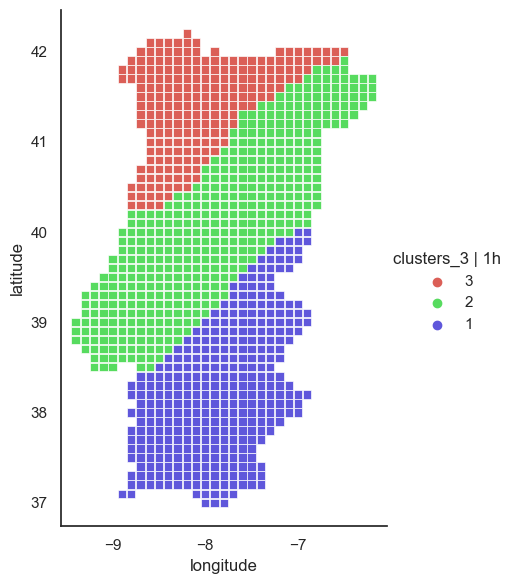

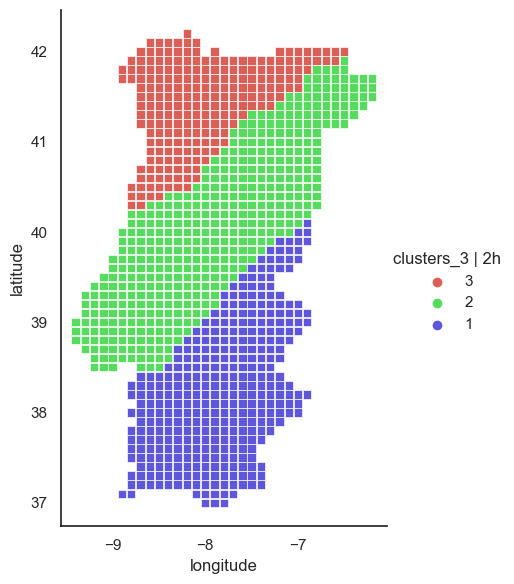

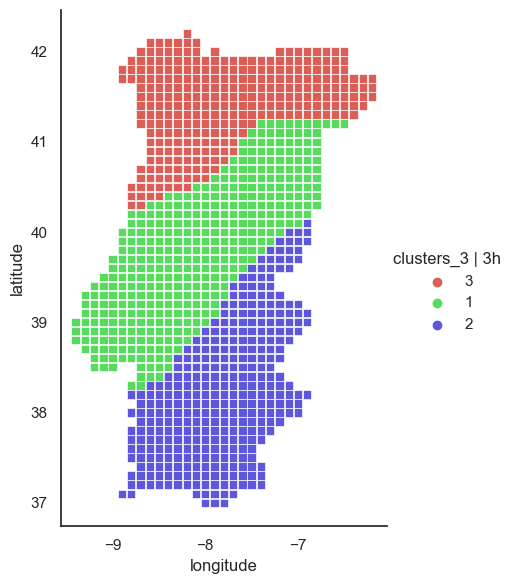

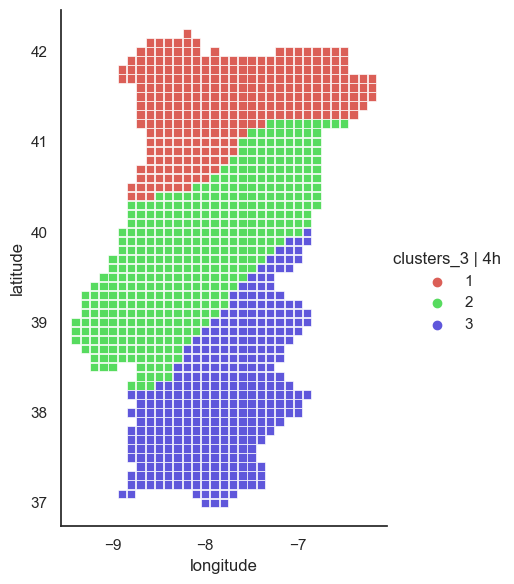

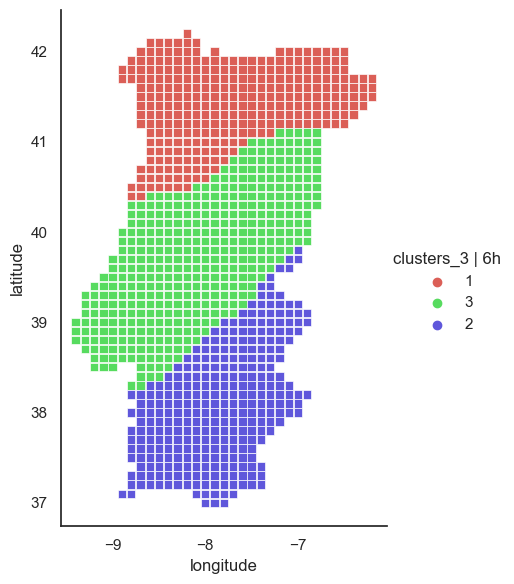

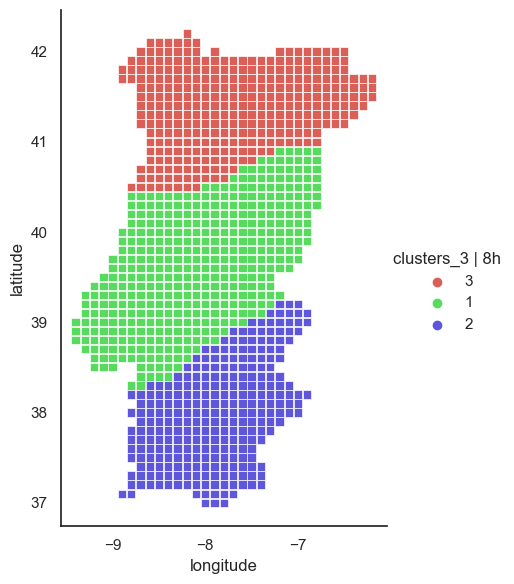

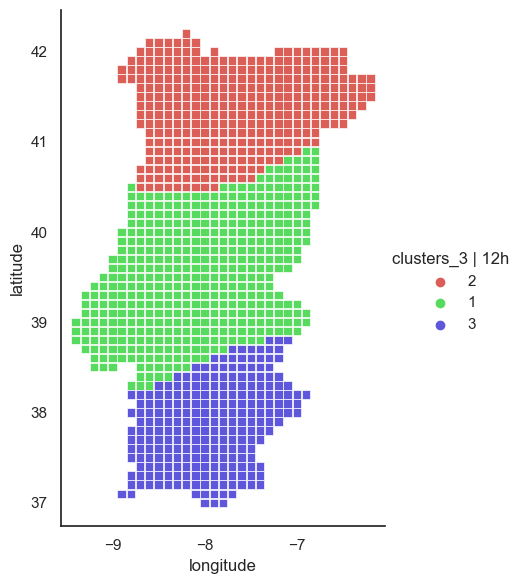

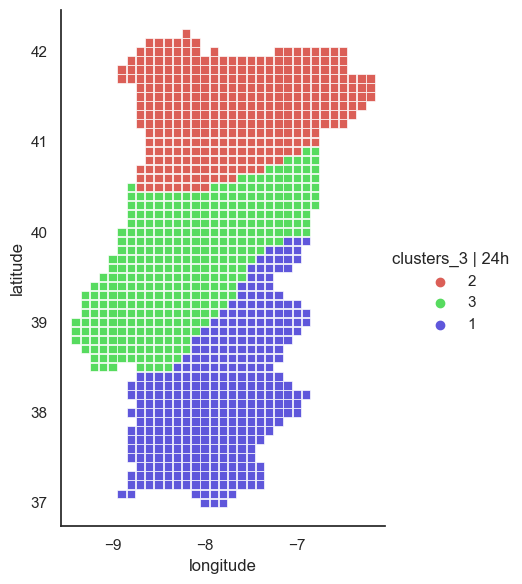

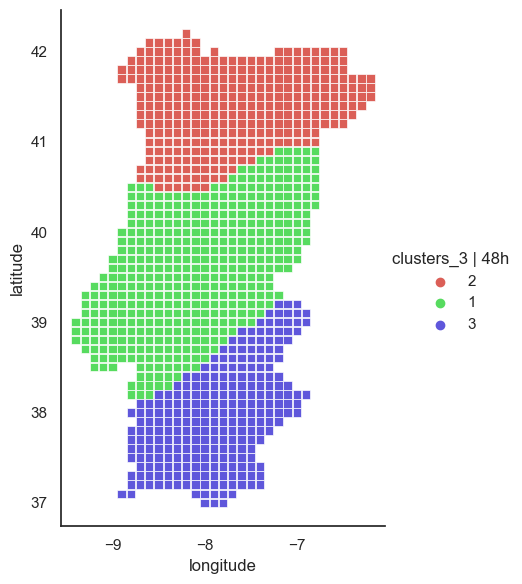

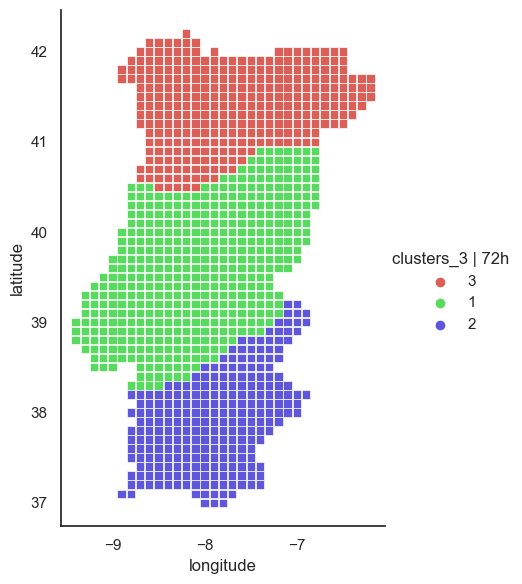

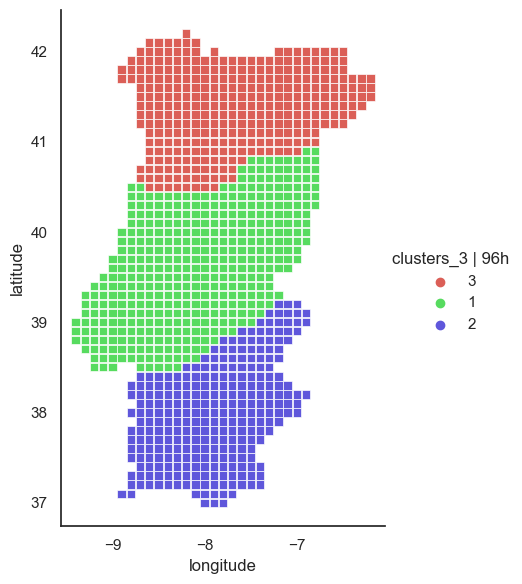

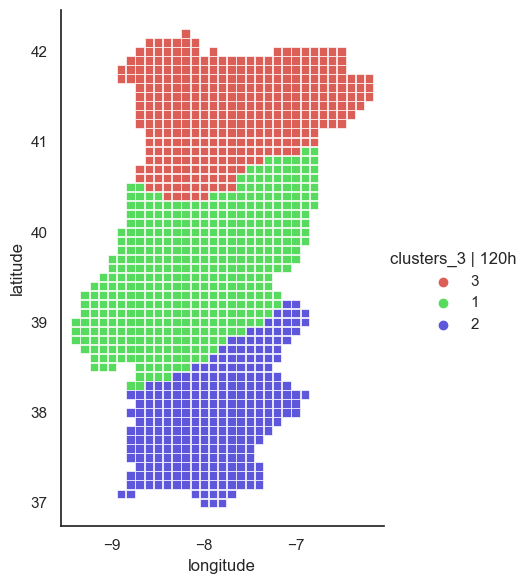

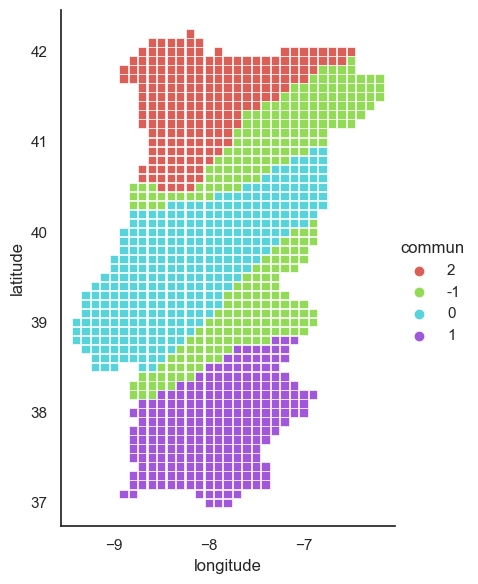

In [10]:
# Visualization
seq_clusters[m] = seq_clusters[m].reset_index(drop = True)
df_plot = pd.concat([local, seq_clusters[m]], axis = 1)

# Plotting clusters
for h in H:
    sns.set_theme(style = 'white')
    sns.relplot(data = df_plot, x = "longitude", y = "latitude", hue = "clusters_" + str(m) + " | " + str(h) + "h", palette = "hls", marker="s", height=6, aspect=0.7)
    plt.show()
    
# Plotting commun area
sns.set_theme(style = 'white')
sns.relplot(data = df_plot, x = "longitude", y = "latitude", hue = "commun", palette = "hls", marker="s", height=6, aspect=0.7)
plt.show()